Download Dataset from below link 

https://www.kaggle.com/competitions/denoising-dirty-documents/data

In [2]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/105.0.0.0 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: ar-AE,ar;q=0.9,en-US;q=0.8,en;q=0.7" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/4406/34170/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1663476217&Signature=YG0XmC%2BzCqAwCfNc3N%2FRxcY5Mk88NPzMutL8avGPx3WLu1m5yFpbuE7gyOTK5UriZXswjnBaIefgguwfK9LyxwJ5Lre%2F8RxKk4%2BPb%2FvKxTnUrwKqZ3zH2PmU68kseyb3lfNEd5N0cVNGeGglU7OSaUSxzHN86IwMUHuuterfCT8%2BcaWMV0%2FHWsmMy6mEWRM%2FGhtm%2BaNNx83jqN7t4xN952tcoPYZrS6GYjd8JZ4dqwtMSTB4cd8fBbHmjiERqu%2FIOM90FxoGi%2B4KuEw3axaEMXOYkbUZCeo%2FgrpAhvlEFwR6JXSTRxBrPyA3vk08VjwFwhMWn79%2BmtT4OUpivXXFYg%3D%3D&response-content-disposition=attachment%3B+filename%3Ddenoising-dirty-documents.zip" -c -O 'denoising-dirty-documents.zip'

--2022-09-15 04:43:59--  https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/4406/34170/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1663476217&Signature=YG0XmC%2BzCqAwCfNc3N%2FRxcY5Mk88NPzMutL8avGPx3WLu1m5yFpbuE7gyOTK5UriZXswjnBaIefgguwfK9LyxwJ5Lre%2F8RxKk4%2BPb%2FvKxTnUrwKqZ3zH2PmU68kseyb3lfNEd5N0cVNGeGglU7OSaUSxzHN86IwMUHuuterfCT8%2BcaWMV0%2FHWsmMy6mEWRM%2FGhtm%2BaNNx83jqN7t4xN952tcoPYZrS6GYjd8JZ4dqwtMSTB4cd8fBbHmjiERqu%2FIOM90FxoGi%2B4KuEw3axaEMXOYkbUZCeo%2FgrpAhvlEFwR6JXSTRxBrPyA3vk08VjwFwhMWn79%2BmtT4OUpivXXFYg%3D%3D&response-content-disposition=attachment%3B+filename%3Ddenoising-dirty-documents.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.197.128, 74.125.135.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.197.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37460781 (36M) [application/zip]
Saving to: ‘denoising-dirty-docu

Unzip data

In [3]:
!unzip /content/denoising-dirty-documents.zip
!unzip /content/train.zip
!unzip /content/test.zip
!unzip /content/train_cleaned.zip

Archive:  /content/denoising-dirty-documents.zip
  inflating: sampleSubmission.csv.zip  
  inflating: test.zip                
  inflating: train.zip               
  inflating: train_cleaned.zip       
Archive:  /content/train.zip
   creating: train/
  inflating: train/101.png           
  inflating: train/102.png           
  inflating: train/104.png           
  inflating: train/105.png           
 extracting: train/107.png           
 extracting: train/108.png           
 extracting: train/11.png            
  inflating: train/110.png           
 extracting: train/111.png           
  inflating: train/113.png           
  inflating: train/114.png           
 extracting: train/116.png           
  inflating: train/117.png           
 extracting: train/119.png           
 extracting: train/12.png            
 extracting: train/120.png           
  inflating: train/122.png           
 extracting: train/123.png           
  inflating: train/125.png           
  inflating: train/126.png

In [4]:
import cv2
import glob
import keras
from keras import layers
import numpy as np
import random
import tensorflow as tf
seed=42
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

In [7]:
Size=480

Load data

In [5]:
img_train = [cv2.imread(file) for file in glob.glob('/content/train/*.png')]
img_train_cleaned = [cv2.imread(file) for file in glob.glob('/content/train_cleaned/*.png')]

In [6]:
img_train_size=[image.shape for image in img_train]

In [8]:
img_train_size

[(258, 540, 3),
 (420, 540, 3),
 (420, 540, 3),
 (420, 540, 3),
 (420, 540, 3),
 (420, 540, 3),
 (258, 540, 3),
 (420, 540, 3),
 (420, 540, 3),
 (420, 540, 3),
 (258, 540, 3),
 (420, 540, 3),
 (258, 540, 3),
 (258, 540, 3),
 (420, 540, 3),
 (258, 540, 3),
 (420, 540, 3),
 (420, 540, 3),
 (420, 540, 3),
 (420, 540, 3),
 (258, 540, 3),
 (258, 540, 3),
 (258, 540, 3),
 (420, 540, 3),
 (258, 540, 3),
 (258, 540, 3),
 (420, 540, 3),
 (258, 540, 3),
 (420, 540, 3),
 (420, 540, 3),
 (420, 540, 3),
 (420, 540, 3),
 (420, 540, 3),
 (258, 540, 3),
 (420, 540, 3),
 (420, 540, 3),
 (420, 540, 3),
 (420, 540, 3),
 (420, 540, 3),
 (258, 540, 3),
 (258, 540, 3),
 (420, 540, 3),
 (420, 540, 3),
 (258, 540, 3),
 (420, 540, 3),
 (420, 540, 3),
 (420, 540, 3),
 (420, 540, 3),
 (420, 540, 3),
 (420, 540, 3),
 (420, 540, 3),
 (258, 540, 3),
 (420, 540, 3),
 (420, 540, 3),
 (258, 540, 3),
 (258, 540, 3),
 (420, 540, 3),
 (420, 540, 3),
 (420, 540, 3),
 (258, 540, 3),
 (420, 540, 3),
 (258, 540, 3),
 (258, 5

In [9]:
img_train=[cv2.resize(image, (Size,Size), interpolation = cv2.INTER_AREA) for image in img_train]

In [10]:
img_train_cleaned=[cv2.resize(image, (Size,Size), interpolation = cv2.INTER_AREA) for image in img_train_cleaned]

In [11]:
img_train=np.array(img_train)
img_train_cleaned=np.array(img_train_cleaned)

img_train = img_train.astype('float32') / 255.
img_train_cleaned = img_train_cleaned.astype('float32') / 255.


x_train = np.reshape(img_train, (len(img_train), Size, Size, 3))
img_train_cleaned = np.reshape(img_train_cleaned, (len(img_train_cleaned), Size, Size, 3))

In [12]:
img_train_cleaned.shape

(144, 480, 480, 3)

Our model inspired from U-net arch

In [14]:
from keras import layers
def down(filters , kernel_size, apply_batch_normalization = True):
    downsample = tf.keras.models.Sequential()
    downsample.add(layers.Conv2D(filters,kernel_size,padding = 'same', strides = 2))
    downsample.add(keras.layers.ReLU())
    if apply_batch_normalization:
        downsample.add(layers.BatchNormalization())
    return downsample


def up(filters, kernel_size, apply_batch_normalization = True):
    upsample = tf.keras.models.Sequential()
    upsample.add(layers.Conv2DTranspose(filters, kernel_size,padding = 'same', strides = 2))
    upsample.add(keras.layers.ReLU())
    if apply_batch_normalization:
      upsample.add(layers.BatchNormalization())
    return upsample

In [15]:
def model():
    inputs = layers.Input(shape= [Size,Size,3])
    d1 = down(128,(3,3),False)(inputs)
    d2 = down(128,(3,3),False)(d1)
    d3 = down(256,(3,3),True)(d2)
    d4 = down(512,(3,3),True)(d3)
    
    d5 = down(512,(3,3),True)(d4)
    #upsampling
    u1 = up(512,(3,3))(d5)
    u1 = layers.concatenate([u1,d4])
    u2 = up(256,(3,3))(u1)
    u2 = layers.concatenate([u2,d3])
    u3 = up(128,(3,3))(u2)
    u3 = layers.concatenate([u3,d2])
    u4 = up(128,(3,3))(u3)
    u4 = layers.concatenate([u4,d1])
    u5 = up(3,(3,3))(u4)
    u5 = layers.concatenate([u5,inputs])
    output = layers.Conv2D(3,(2,2),strides = 1, padding = 'same',activation="sigmoid")(u5)
    return tf.keras.Model(inputs=inputs, outputs=output)

In [16]:
model = model()
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 480, 480, 3  0           []                               
                                )]                                                                
                                                                                                  
 sequential (Sequential)        (None, 240, 240, 12  3584        ['input_1[0][0]']                
                                8)                                                                
                                                                                                  
 sequential_1 (Sequential)      (None, 120, 120, 12  147584      ['sequential[0][0]']             
                                8)                                                            

In [17]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01), loss ='mean_absolute_error',metrics = ['acc'])


In [18]:
import gc 
gc.collect()

826

In [19]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='loss',patience=12)]

In [20]:
model.fit(img_train, img_train_cleaned, epochs = 300,batch_size = 32,verbose = 1,validation_split=0.1,shuffle=True,callbacks = my_callbacks)

Epoch 1/300
5/5 [==============================] - 33s 2s/step - loss: 0.3628 - acc: 0.8319 - val_loss: 0.8775 - val_acc: 0.9238
Epoch 2/300
5/5 [==============================] - 5s 1s/step - loss: 0.2376 - acc: 0.8382 - val_loss: 0.8532 - val_acc: 0.9813
Epoch 3/300
5/5 [==============================] - 6s 1s/step - loss: 0.1391 - acc: 0.8568 - val_loss: 0.8411 - val_acc: 0.9896
Epoch 4/300
5/5 [==============================] - 6s 1s/step - loss: 0.0910 - acc: 0.8296 - val_loss: 0.8016 - val_acc: 0.9246
Epoch 5/300
5/5 [==============================] - 6s 1s/step - loss: 0.0655 - acc: 0.7870 - val_loss: 0.6757 - val_acc: 0.9218
Epoch 6/300
5/5 [==============================] - 6s 1s/step - loss: 0.0521 - acc: 0.6367 - val_loss: 0.4697 - val_acc: 0.8514
Epoch 7/300
5/5 [==============================] - 6s 1s/step - loss: 0.0430 - acc: 0.6067 - val_loss: 0.2953 - val_acc: 0.7412
Epoch 8/300
5/5 [==============================] - 6s 1s/step - loss: 0.0379 - acc: 0.6470 - val_loss: 

On train Data

In [35]:
decoded_imgs = model.predict(img_train)

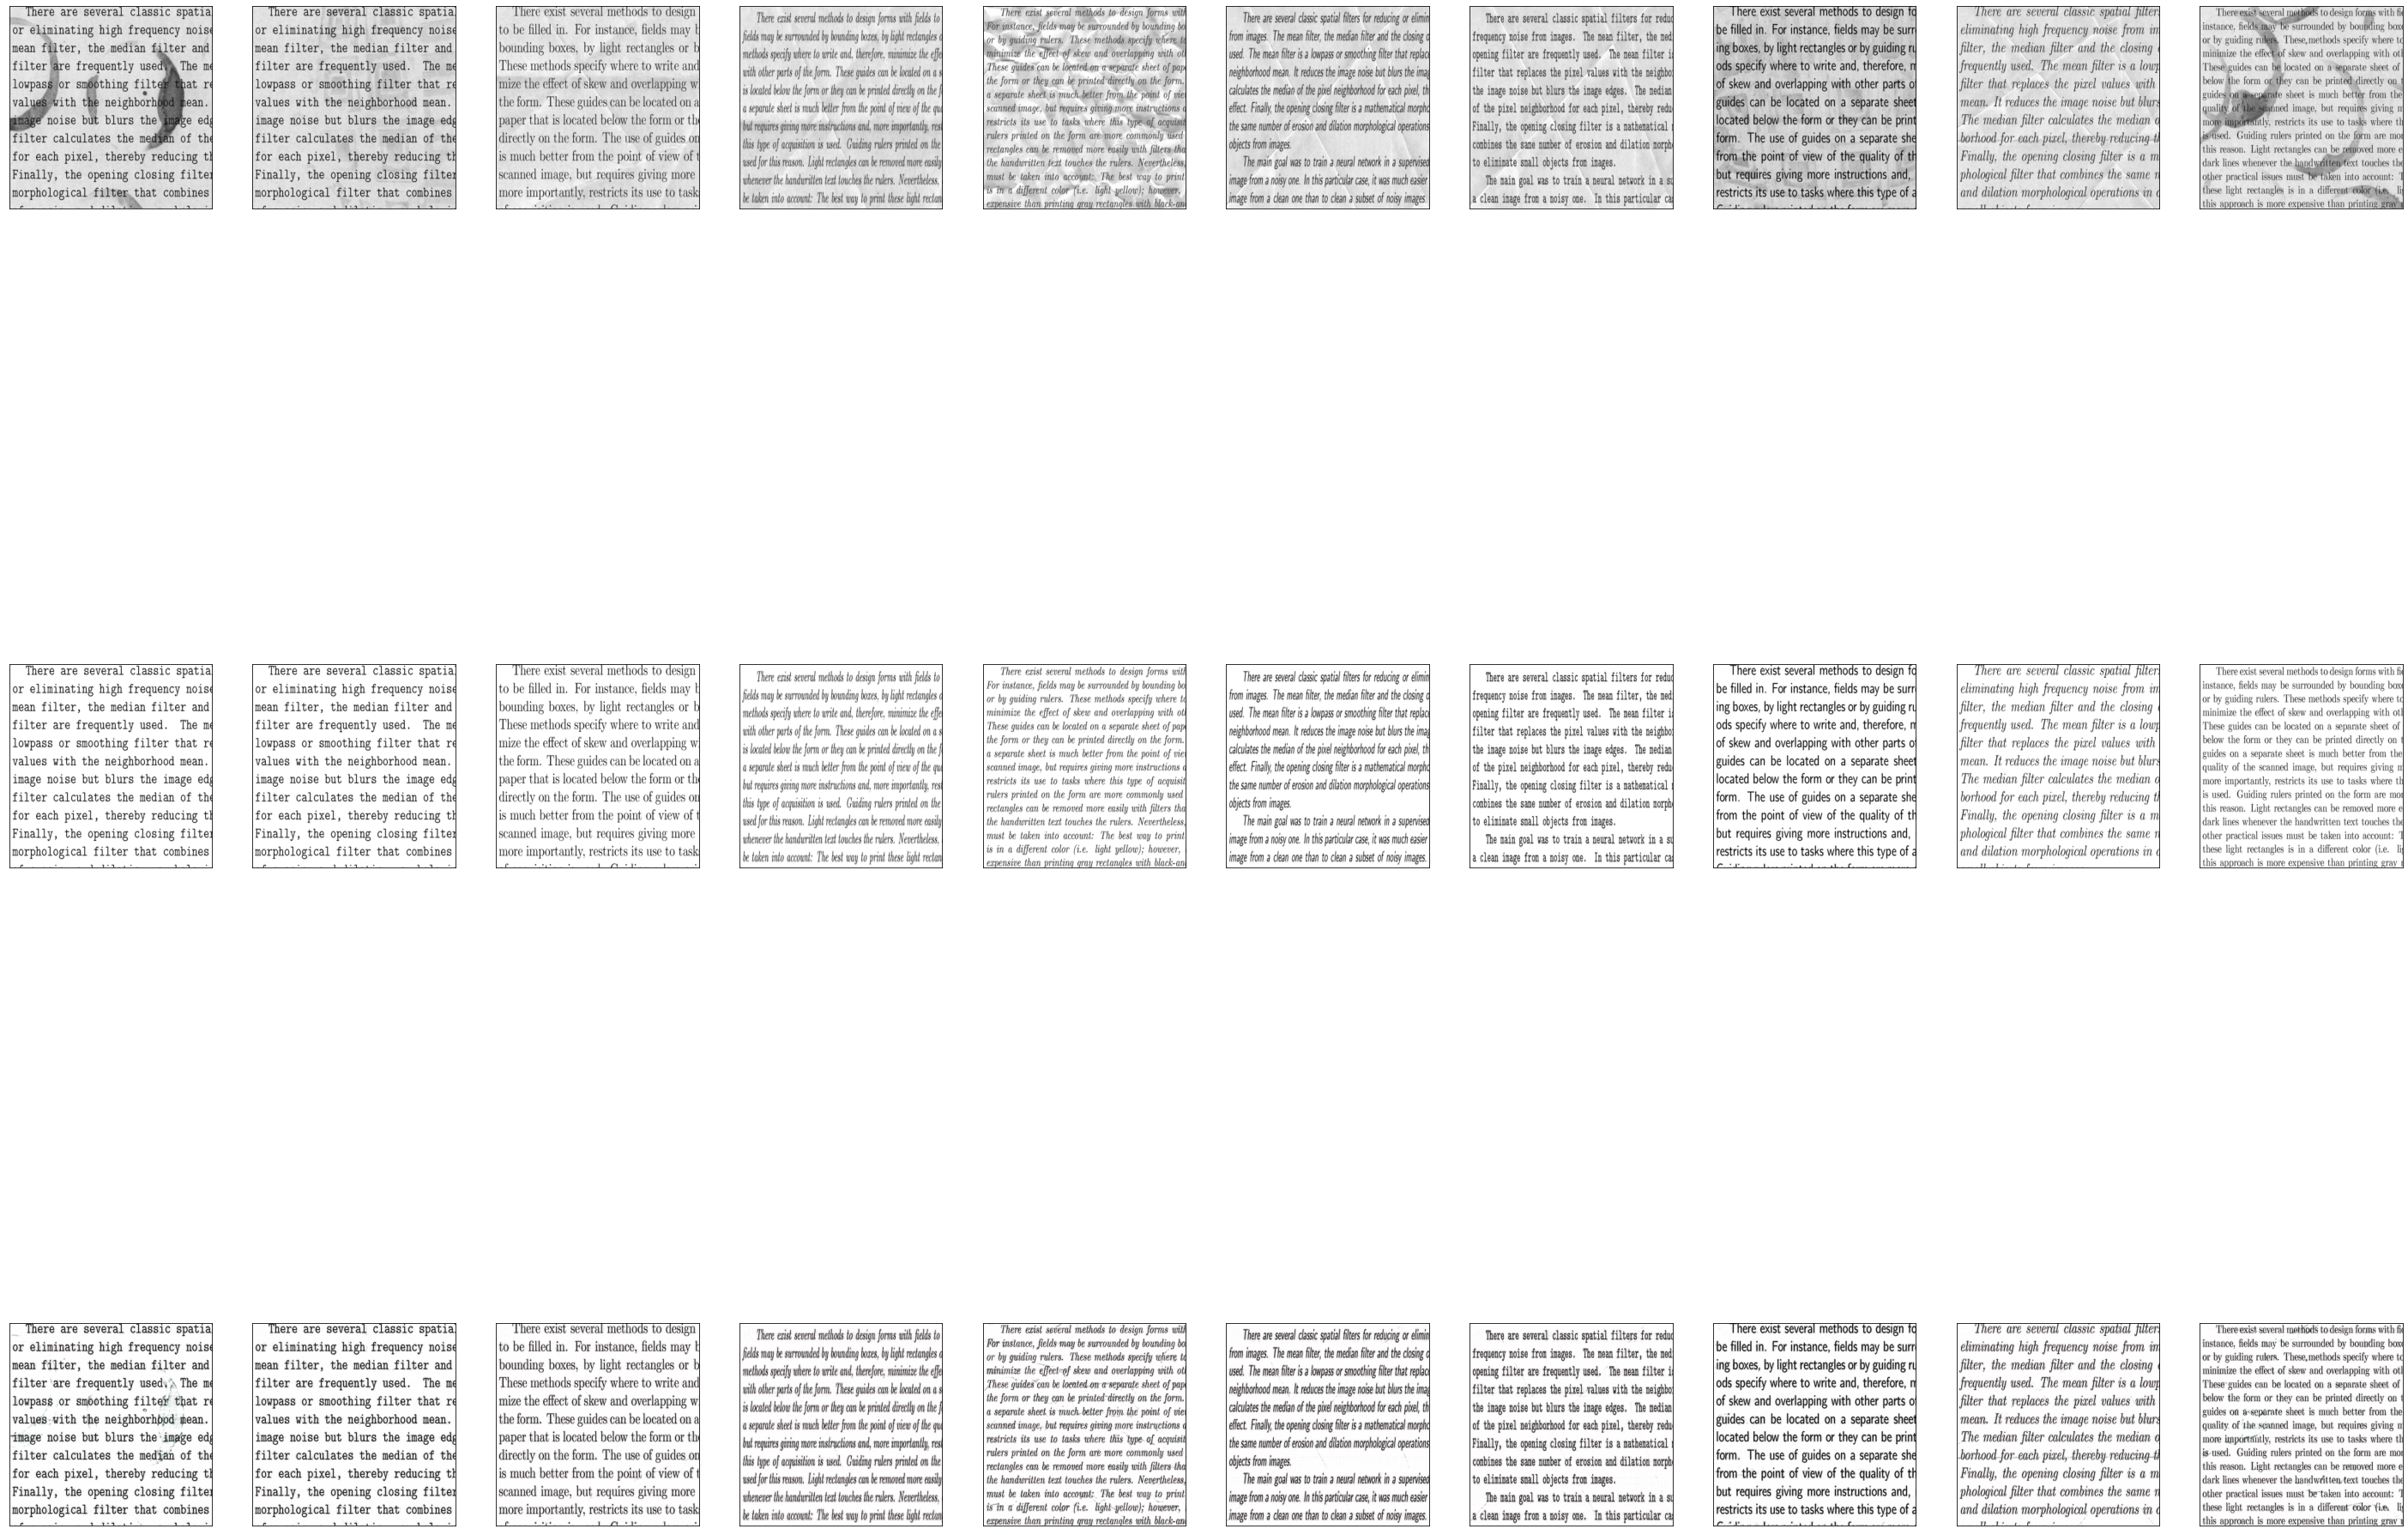

In [36]:
import matplotlib.pyplot as plt
import random
n=10
indexes=random.sample(range(0, img_train.shape[0]), n+1)
plt.figure(figsize=(50, 40))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(3, n, i)
    plt.imshow(img_train[indexes[i]].reshape(Size,Size,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # Display original
    ax = plt.subplot(3, n, i + n)
    plt.imshow(img_train_cleaned[indexes[i]].reshape(Size,Size,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # Display reconstruction
    ax = plt.subplot(3, n, i + 2*n)
    plt.imshow(decoded_imgs[indexes[i]].reshape(Size,Size,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [26]:
img_test = [cv2.imread(file) for file in glob.glob('/content/test/*.png')]
img_test=[cv2.resize(image, (Size,Size), interpolation = cv2.INTER_AREA) for image in img_test]
img_test=np.array(img_test)
img_test = img_test.astype('float32') / 255.
img_test = np.reshape(img_test, (len(img_test), Size, Size, 3))

In [37]:
decoded_imgs = model.predict(img_test)

On test Data

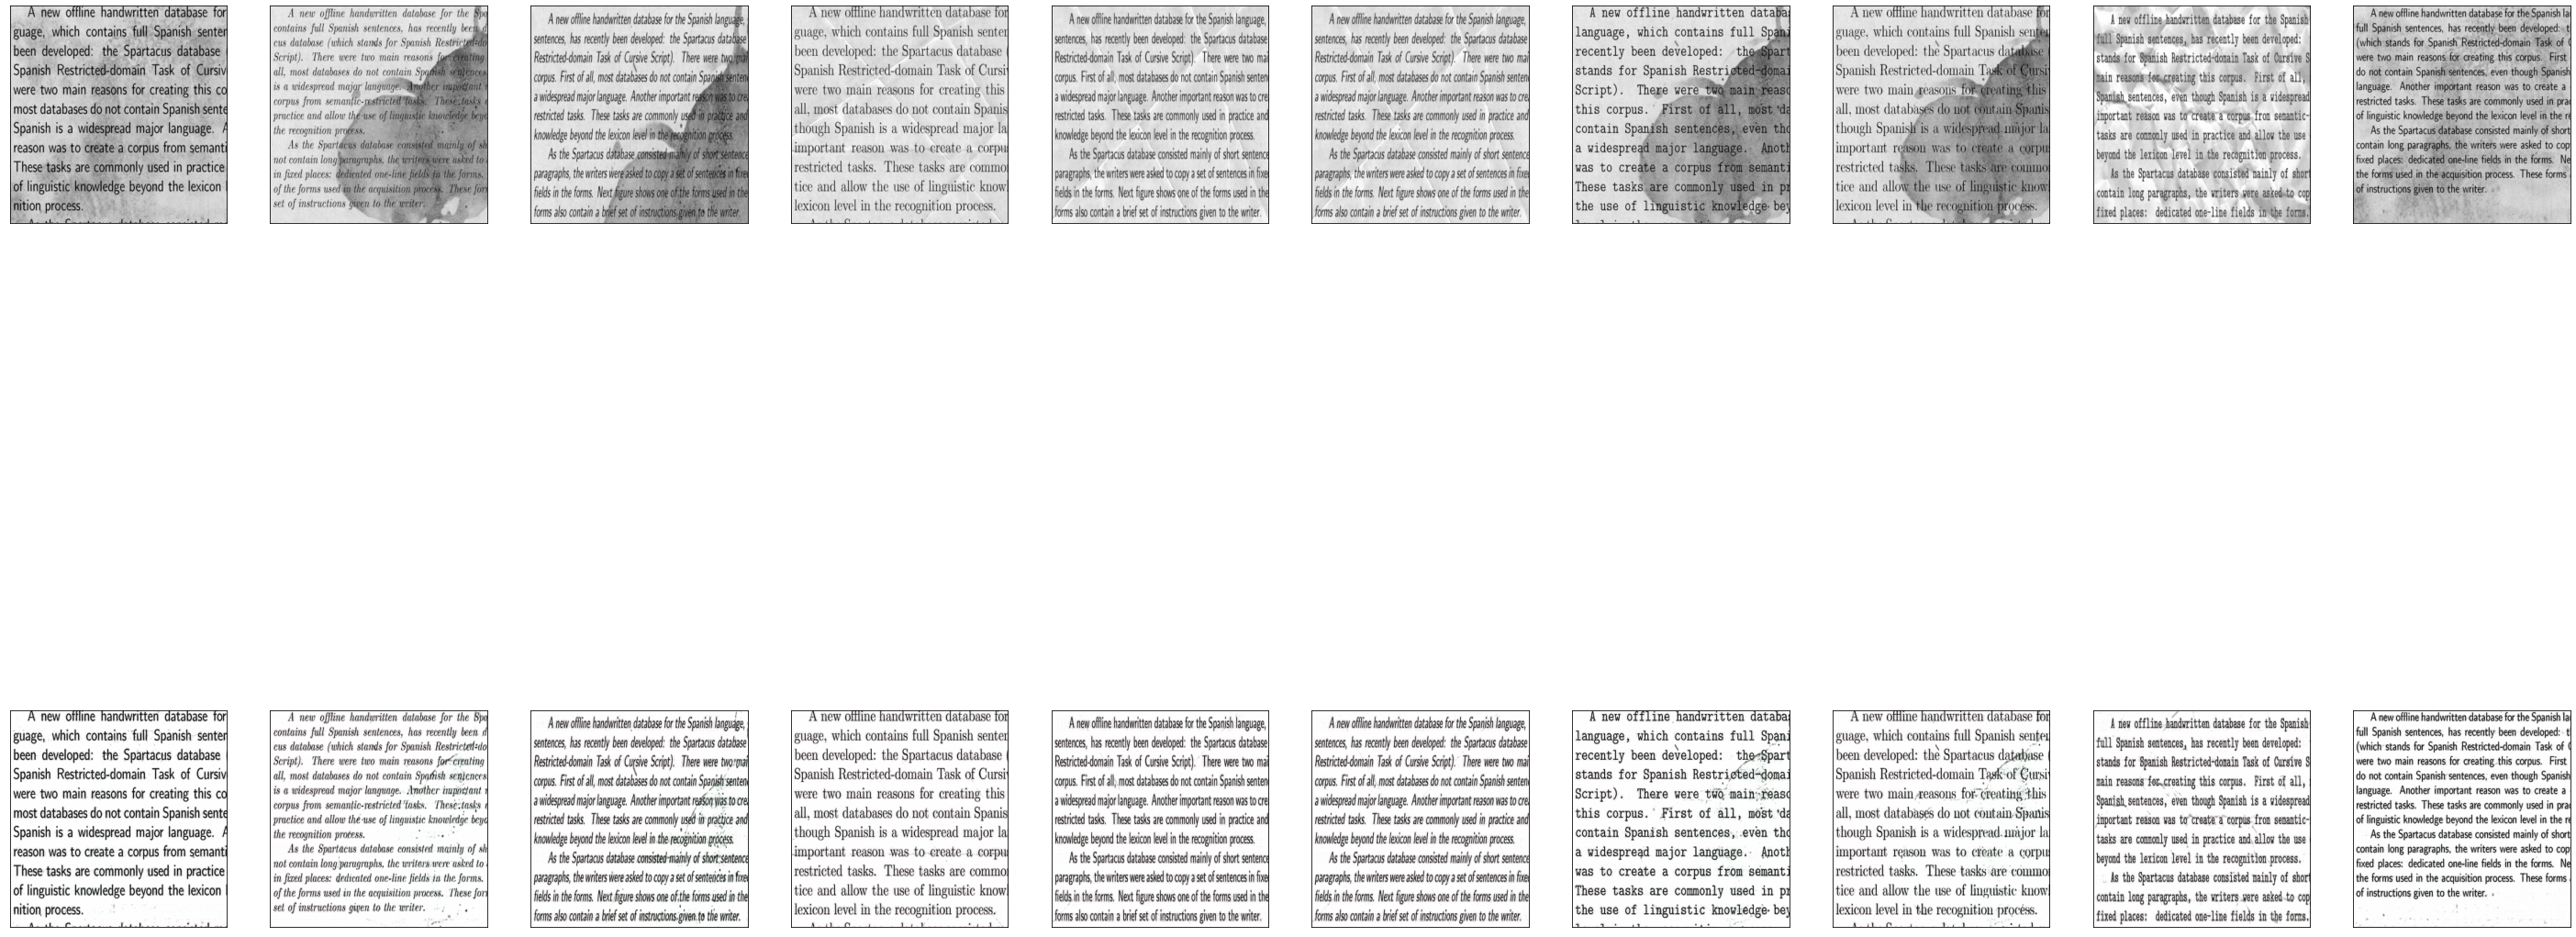

In [39]:
import matplotlib.pyplot as plt
import random
n=10
indexes=random.sample(range(0, img_test.shape[0]), n+1)
plt.figure(figsize=(50, 40))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(3, n, i)
    plt.imshow(img_test[indexes[i]].reshape(Size,Size,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # Display predicted
    ax = plt.subplot(3, n, i + n)
    plt.imshow(decoded_imgs[indexes[i]].reshape(Size,Size,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()